In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [35]:
data =pd.read_csv('C:\\Users\\91867\\Documents\\LM10_EDA\\LM10.csv')

In [36]:
df= data.copy()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            704 non-null    object
 1   Competition       704 non-null    object
 2   Matchday          704 non-null    object
 3   Date              704 non-null    object
 4   Venue             704 non-null    object
 5   Club              704 non-null    object
 6   Opponent          704 non-null    object
 7   Result            704 non-null    object
 8   Playing_Position  704 non-null    object
 9   Minute            704 non-null    object
 10  At_score          704 non-null    object
 11  Type              703 non-null    object
 12  Goal_assist       490 non-null    object
dtypes: object(13)
memory usage: 71.6+ KB


In [38]:
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04/05,LaLiga,34,05-01/05,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho
1,05/06,UEFA Champions League,Group Stage,11-02/05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo
3,05/06,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho


In [39]:
#Clean data(Handle null values using forward filling)

df.isna().sum()


Season                0
Competition           0
Matchday              0
Date                  0
Venue                 0
Club                  0
Opponent              0
Result                0
Playing_Position      0
Minute                0
At_score              0
Type                  1
Goal_assist         214
dtype: int64

In [40]:
df["Type"].fillna(df["Type"].mode()[0],axis =0,inplace=True)

In [41]:
df["Goal_assist"].fillna("No assist",axis=0 ,inplace=True)

In [42]:
df["Competition"]=df["Competition"].str.replace("UEFA UEFA Champions League",'UEFA Champions League' )
df["Competition"]=df["Competition"].str.replace("Trophï¿½e des Champions",'TrophÃ©e des Champions' )

df["Competition"].value_counts()

Competition
LaLiga                   474
UEFA Champions League    128
Copa del Rey              56
Ligue 1                   21
Supercopa                 14
FIFA Club World Cup        5
UEFA Super Cup             3
Trophée des Champions      1
Troph�e des Champions      1
Champions League           1
Name: count, dtype: int64

In [43]:
df["Season"]=df["Season"].str.replace('11-Dec','11/12' )
df["Season"]=df["Season"].str.replace('Dec-13','12/13' )
df["Playing_Position"]=df["Playing_Position"].str.replace("CF ","CF")
df["Playing_Position"]=df["Playing_Position"].str.replace("SS ","SS")
df["Playing_Position"]=df["Playing_Position"].replace("RW ","RW")
df["Playing_Position"]=df["Playing_Position"].replace("AM ","AM")

In [44]:
#check duplicates

df.duplicated().sum()


0

In [45]:
#goals for every competition

df["Competition"]

0                     LaLiga
1      UEFA Champions League
2                     LaLiga
3                     LaLiga
4                     LaLiga
               ...          
699                  Ligue 1
700                  Ligue 1
701                  Ligue 1
702                  Ligue 1
703                  Ligue 1
Name: Competition, Length: 704, dtype: object

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'LaLiga'),
  Text(1, 0, 'UEFA Champions League'),
  Text(2, 0, 'Copa del Rey'),
  Text(3, 0, 'Supercopa'),
  Text(4, 0, 'FIFA Club World Cup'),
  Text(5, 0, 'UEFA Super Cup'),
  Text(6, 0, 'Ligue 1'),
  Text(7, 0, 'Trophée des Champions'),
  Text(8, 0, 'Troph�e des Champions'),
  Text(9, 0, 'Champions League')])

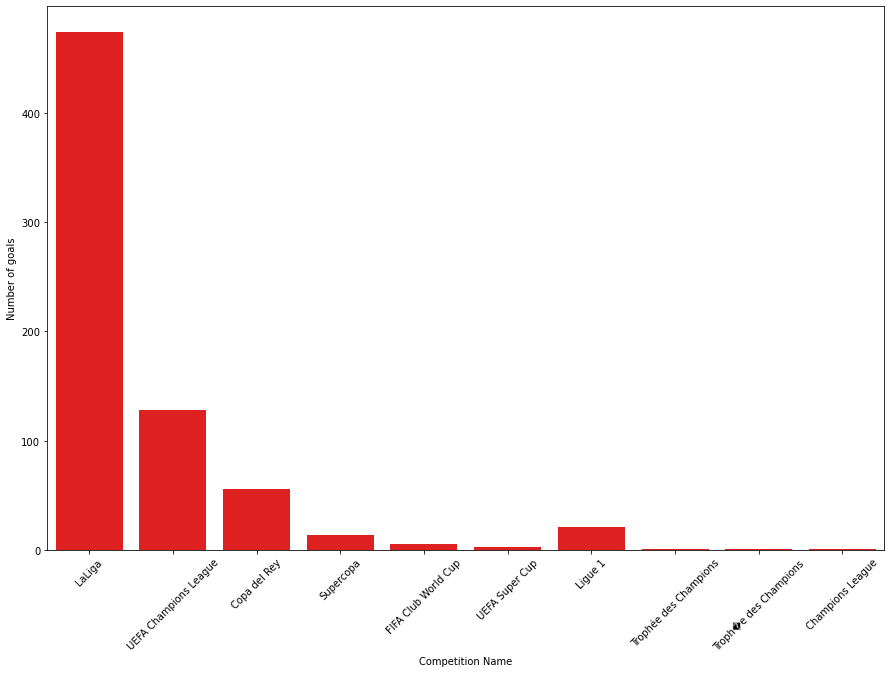

In [46]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x="Competition", color="red")
plt.xlabel("Competition Name")
plt.ylabel("Number of goals")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '04/05'),
  Text(1, 0, '05/06'),
  Text(2, 0, '06/07'),
  Text(3, 0, '07/08'),
  Text(4, 0, '08/09'),
  Text(5, 0, '09/10'),
  Text(6, 0, '10/11'),
  Text(7, 0, '11/12'),
  Text(8, 0, '12/13'),
  Text(9, 0, '13/14'),
  Text(10, 0, '14/15'),
  Text(11, 0, '15/16'),
  Text(12, 0, '16/17'),
  Text(13, 0, '17/18'),
  Text(14, 0, '18/19'),
  Text(15, 0, '19/20'),
  Text(16, 0, '20/21'),
  Text(17, 0, '21/22'),
  Text(18, 0, '22/23')])

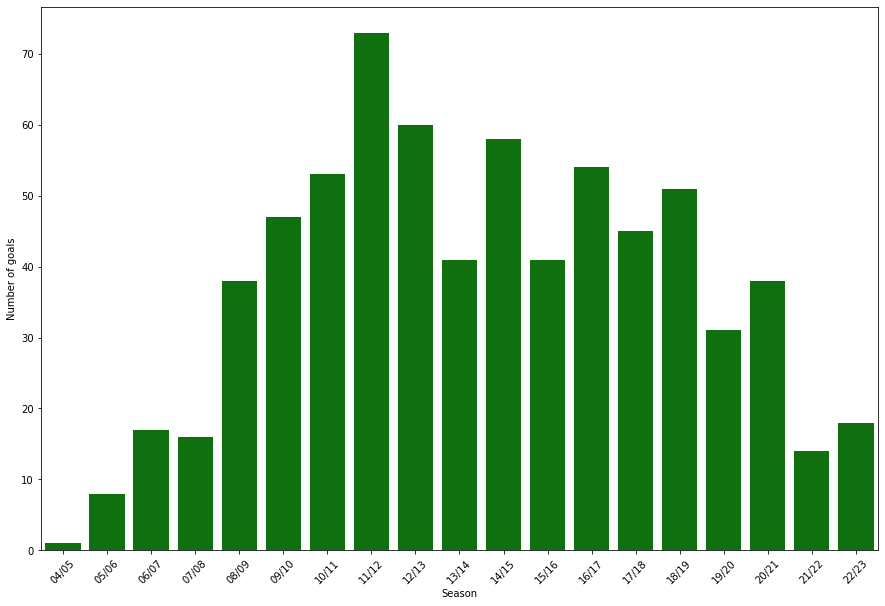

In [47]:
#goals for every season

plt.figure(figsize=(15,10))
sns.countplot(data=df,x=df["Season"],color="green")
plt.xlabel("Season")
plt.ylabel("Number of goals")
plt.xticks(rotation=45)

In [48]:
#goals per position

df["Playing_Position"].value_counts()

Playing_Position
CF    316
RW    316
SS     55
AM     16
LW      1
Name: count, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'CF'),
  Text(1, 0, 'RW'),
  Text(2, 0, 'LW'),
  Text(3, 0, 'SS'),
  Text(4, 0, 'AM')])

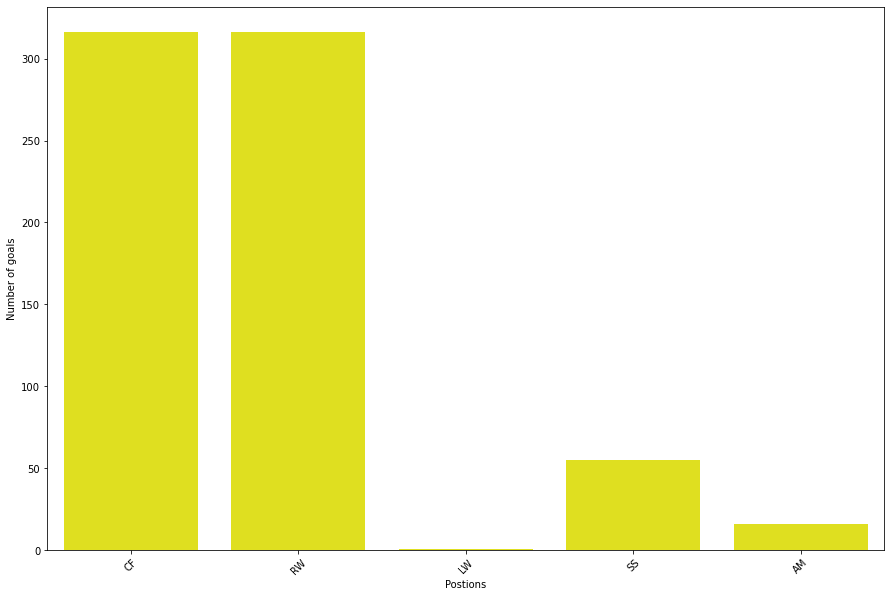

In [49]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,x=df["Playing_Position"],color="Yellow")
plt.xlabel("Postions")
plt.ylabel("Number of goals")
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, 'H'), Text(1, 0, 'A')])

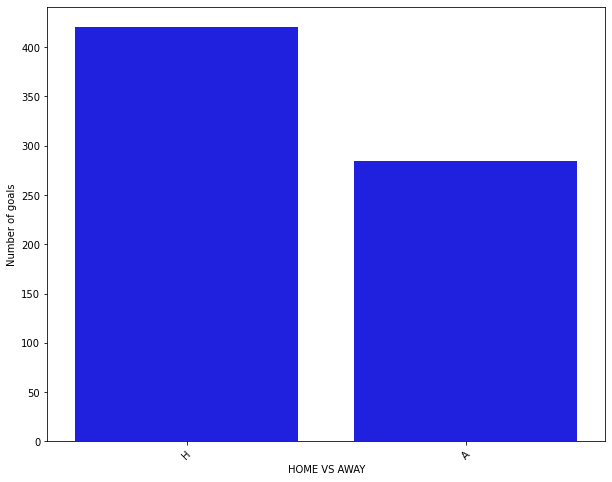

In [50]:
#goals per home or away

plt.figure(figsize=(10,8))
sns.countplot(data=df,x=df["Venue"],color="blue")
plt.xlabel("HOME VS AWAY")
plt.ylabel("Number of goals")
plt.xticks(rotation=45)

In [51]:
#most goals against teams

top10=df["Opponent"].value_counts().sort_values(ascending=False).head(10)
top10

Opponent
Sevilla FC                38
Atletico de Madrid        32
Valencia CF               31
Athletic Bilbao           29
Real Betis Balompie       26
Real Madrid               26
RCD Espanyol Barcelona    25
CA Osasuna                25
Levante UD                24
Getafe CF                 21
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sevilla FC'),
  Text(1, 0, 'Atletico de Madrid'),
  Text(2, 0, 'Valencia CF'),
  Text(3, 0, 'Athletic Bilbao'),
  Text(4, 0, 'Real Betis Balompie'),
  Text(5, 0, 'Real Madrid'),
  Text(6, 0, 'RCD Espanyol Barcelona'),
  Text(7, 0, 'CA Osasuna'),
  Text(8, 0, 'Levante UD'),
  Text(9, 0, 'Getafe CF')])

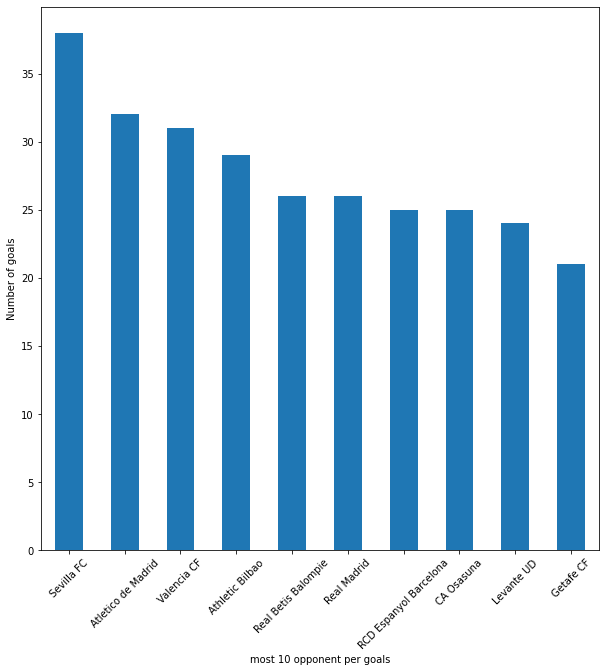

In [52]:
plt.figure(figsize=(10,10))
top10.plot(kind='bar')
plt.xlabel("most 10 opponent per goals")
plt.ylabel("Number of goals")
plt.xticks(rotation=45)